# MIS-6 
# END SEM PROJECT 
# DETECTION OF AI GENERATED IMAGES AND REAL IMAGES OF HUMAN FACES USING NEURAL NETWORK METHODS 


TEAM MEMBERS :-
1. Manjunath KP                CB.EN.U4AIE21133
2. Mokshit Kumar Jain Ranka    CB.EN.U4AIE21135
3. Rahul Krishna               CB.EN.U4AIE21151
4. Shirish krishna             CB.EN.U4AIE21157

## About the dataset:-

DATASET INFORMATIONS  :-
1. 15K AI images ( )
2.  15K real images (Celebrity image dataset )

Sizes of the images vary greatly through out the dataset 

The real imgaes are taken from the Celeb face dataset which has many celebrity faces 

The AI generated images has been taken from the Synthetic Faces High Quality (SFHQ) part 1 

Both the datasets are open to the public and can be used for research porposes 

Note:-
The actaul datasets contain approximately a million Images . Ruuning a model on that amount of images in our local systems posed a great chalenge due to which we have chosen a smaller smale of the same data inorder to show our findings .

A few samples of the images in the dataset:-

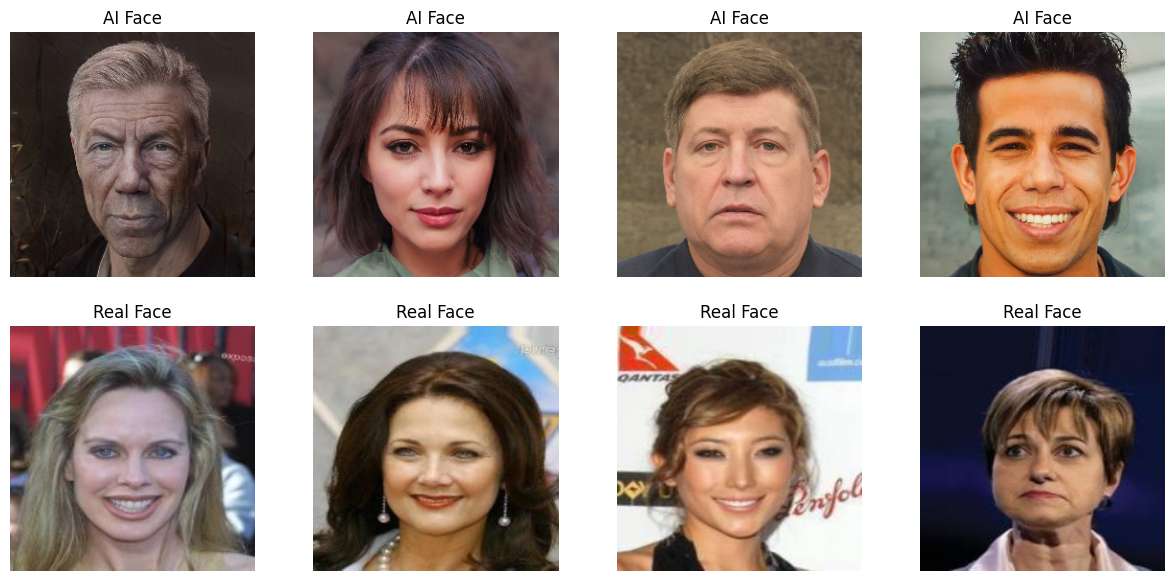

In [13]:
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Function to load a specific number of random images from a folder
def load_random_images(folder, n_images, img_size):
    all_images = os.listdir(folder)
    random_images = random.sample(all_images, n_images)
    images = []
    for img_name in random_images:
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        images.append(img)
    return np.array(images)

# Parameters
img_size = (256, 256)
n_images_per_class = 4

# Load 4 random images from both folders
folder1 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\dataset\AI_faces'
folder2 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\dataset\real_faces'
images_ai = load_random_images(folder1, n_images_per_class, img_size)
images_real = load_random_images(folder2, n_images_per_class, img_size)

# Plotting the images
fig, axs = plt.subplots(2, 4, figsize=(15, 7))

# Plot AI-generated faces
for i in range(n_images_per_class):
    axs[0, i].imshow(cv2.cvtColor(images_ai[i], cv2.COLOR_BGR2RGB))
    axs[0, i].axis('off')
    axs[0, i].set_title('AI Face')

# Plot Real faces
for i in range(n_images_per_class):
    axs[1, i].imshow(cv2.cvtColor(images_real[i], cv2.COLOR_BGR2RGB))
    axs[1, i].axis('off')
    axs[1, i].set_title('Real Face')

plt.show()


Now we have tried to classify this using the normal classification method through CNN

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.5519 - loss: 0.6969 - val_accuracy: 0.7400 - val_loss: 0.5261
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.7684 - loss: 0.5185 - val_accuracy: 0.8167 - val_loss: 0.4791
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.8206 - loss: 0.4808 - val_accuracy: 0.7633 - val_loss: 0.4639
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.7713 - loss: 0.4822 - val_accuracy: 0.8433 - val_loss: 0.4266
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.8330 - loss: 0.4055 - val_accuracy: 0.8600 - val_loss: 0.3562
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.8283 - loss: 0.3789 - val_accuracy: 0.8633 - val_loss: 0.3325
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.8195 - loss: 0.3602 - val_accuracy: 0.8567 - val_loss: 0.3632
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.8414 - loss: 0.3708 - val_accuracy: 0.8567 - val

10/10 - 1s - 50ms/step - accuracy: 0.9000 - loss: 0.2889
Test accuracy: 0.8999999761581421


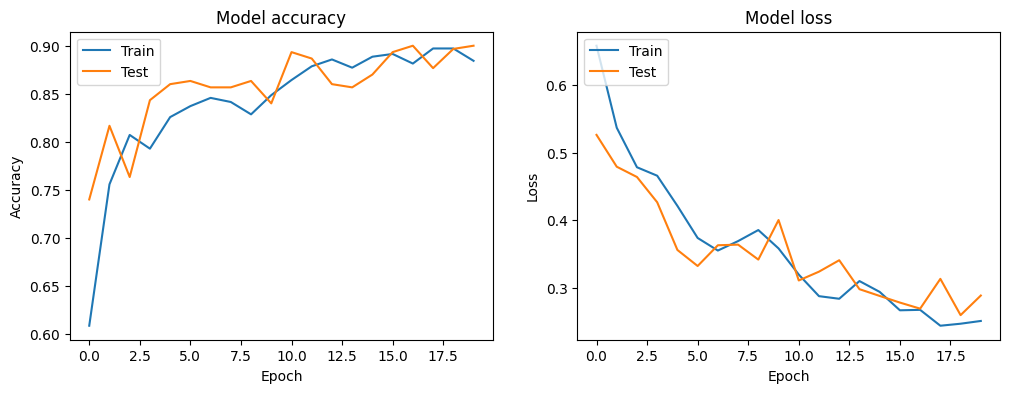

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


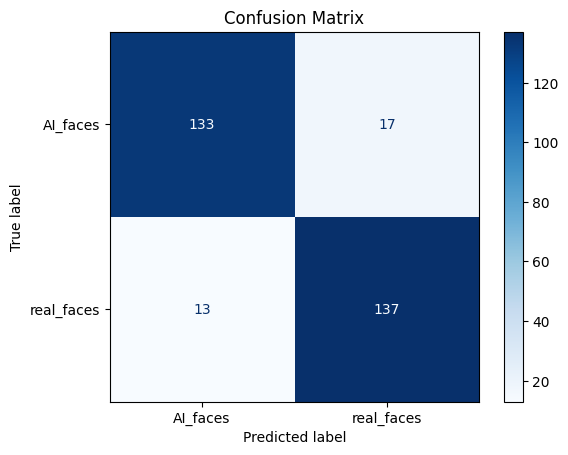

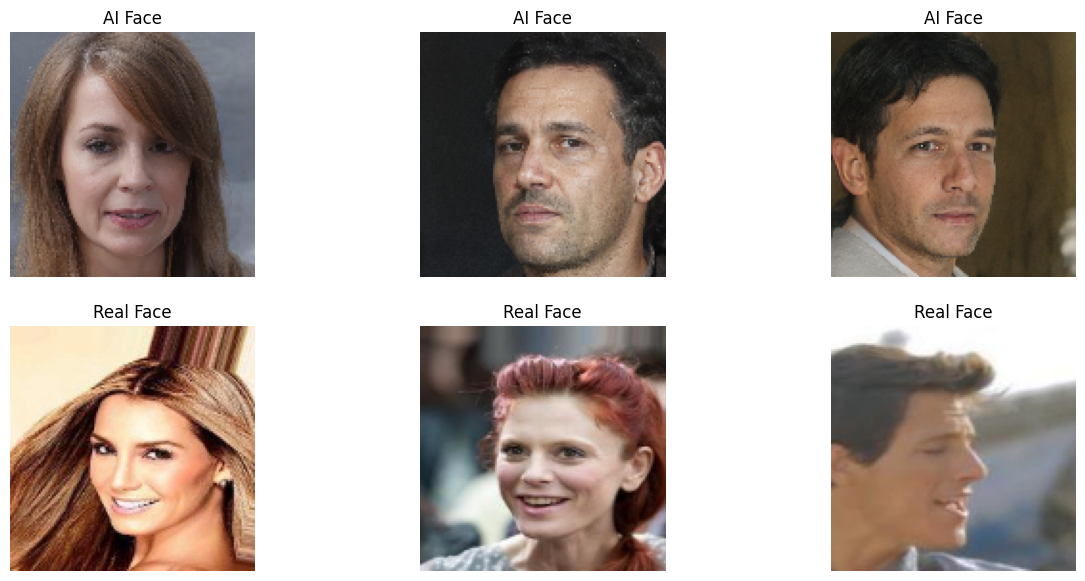

In [45]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Parameters
img_size = (128, 128)
batch_size = 32
epochs = 20
n_images_per_class = 500  # Number of images to load from each folder

# Function to load first n images from a folder
def load_images(folder, img_size, n_images):
    images = []
    labels = []
    filenames = os.listdir(folder)[:n_images]  # Get the first n images
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(folder.split('\\')[-1])  # Use the folder name as the label
    return np.array(images), np.array(labels)

# Load images from both folders
folder1 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\small dataset\AI_faces'
folder2 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\small dataset\real_faces'
images1, labels1 = load_images(folder1, img_size, n_images_per_class)
images2, labels2 = load_images(folder2, img_size, n_images_per_class)

# Combine images and labels
images = np.concatenate((images1, images2), axis=0)
labels = np.concatenate((labels1, labels2), axis=0)

# Normalize the images
images = images / 255.0

# Convert labels to binary
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(X_test, y_test))

model.save('ai_vs_real_face_classifier.h5')

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Display the first 3 images from both classes
fig, axs = plt.subplots(2, 3, figsize=(15, 7))

for i in range(3):
    # AI-generated faces
    axs[0, i].imshow(cv2.cvtColor(images1[i], cv2.COLOR_BGR2RGB))
    axs[0, i].axis('off')
    axs[0, i].set_title('AI Face')

    # Real faces
    axs[1, i].imshow(cv2.cvtColor(images2[i], cv2.COLOR_BGR2RGB))
    axs[1, i].axis('off')
    axs[1, i].set_title('Real Face')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


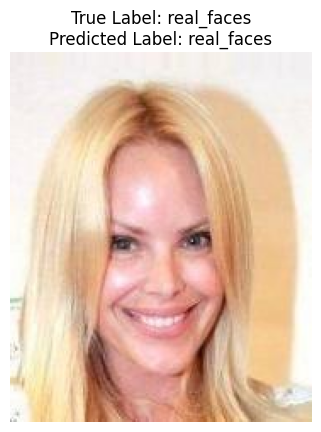

True Label: real_faces
Predicted Label: real_faces


In [49]:
import random
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
img_size = (128, 128)

# Load the saved model
model = tf.keras.models.load_model('ai_vs_real_face_classifier.h5')

# Function to load and preprocess a random image
def load_and_preprocess_random_image(folder1, folder2, img_size):
    # Choose a random folder
    folder = random.choice([folder1, folder2])
    # Choose a random image from the chosen folder
    img_name = random.choice(os.listdir(folder))
    img_path = os.path.join(folder, img_name)
    # Load the image
    img = cv2.imread(img_path)
    # Resize the image
    img = cv2.resize(img, img_size)
    # Normalize the image
    img = img / 255.0
    return img, folder.split('\\')[-1], img_path  # Return image, label (folder name), and path

# Define the folders
folder1 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\small dataset\AI_faces'
folder2 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\small dataset\real_faces'

# Load and preprocess a random image
img, true_label, img_path = load_and_preprocess_random_image(folder1, folder2, img_size)

# Predict the class of the image
img_reshaped = np.expand_dims(img, axis=0)  # Add batch dimension
prediction = model.predict(img_reshaped)
predicted_label = 'AI_faces' if prediction[0] < 0.5 else 'real_faces'

# Display the image and prediction
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title(f'True Label: {true_label}\nPredicted Label: {predicted_label}')
plt.axis('off')
plt.show()

print(f'True Label: {true_label}')
print(f'Predicted Label: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


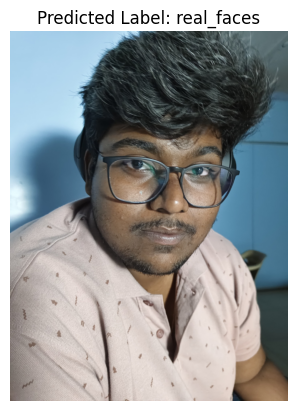

Predicted Label: real_faces


In [8]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
img_size = (128, 128)

# Load the saved model
model = tf.keras.models.load_model('ai_vs_real_face_classifier.h5')

# Function to load and preprocess an image from a given path
def load_and_preprocess_image(img_path, img_size):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, img_size)
        img = img / 255.0  # Normalize the image
        return img
    else:
        raise FileNotFoundError(f"No image found at the path: {img_path}")

# Image path
img_path = r"C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\WhatsApp Image 2024-05-21 at 02.16.41_3fa57f99.jpg"
# Load and preprocess the image
img = load_and_preprocess_image(img_path, img_size)

# Predict the class of the image
img_reshaped = np.expand_dims(img, axis=0)  # Add batch dimension
prediction = model.predict(img_reshaped)
predicted_label = 'AI_faces' if prediction[0] < 0.5 else 'real_faces'

# Display the image and prediction
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

print(f'Predicted Label: {predicted_label}')


Now since we are getting these results lets try to run another method where we are firstly making these images split into the rgb spectrums, then extrac the edges of each colour and then try and run them as inputs of the cnn .

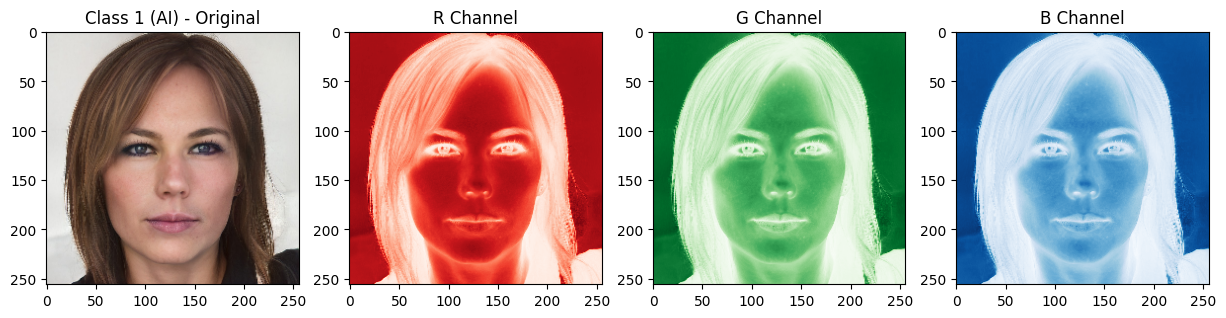

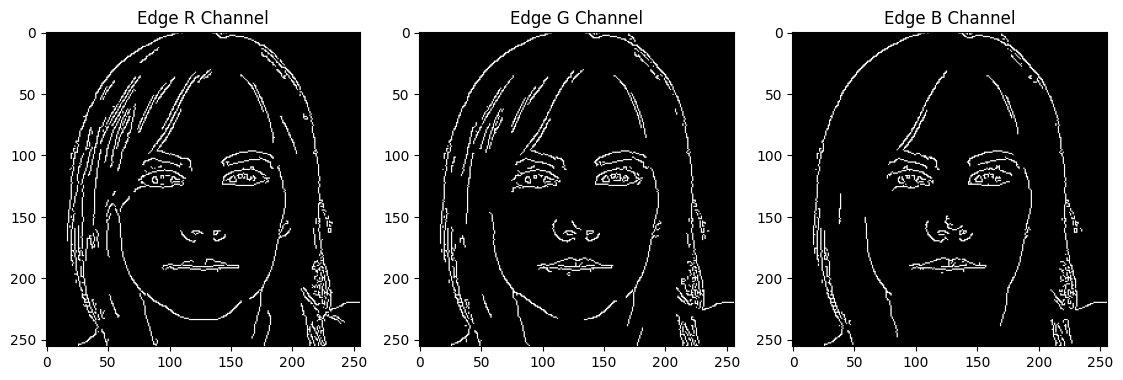

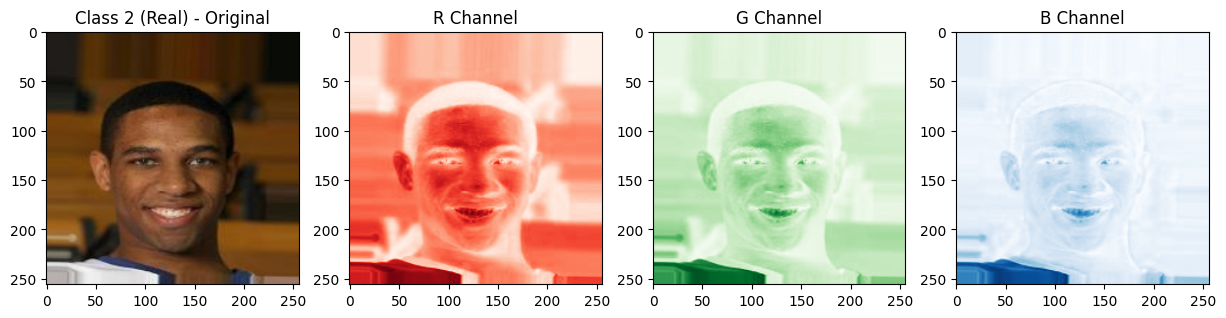

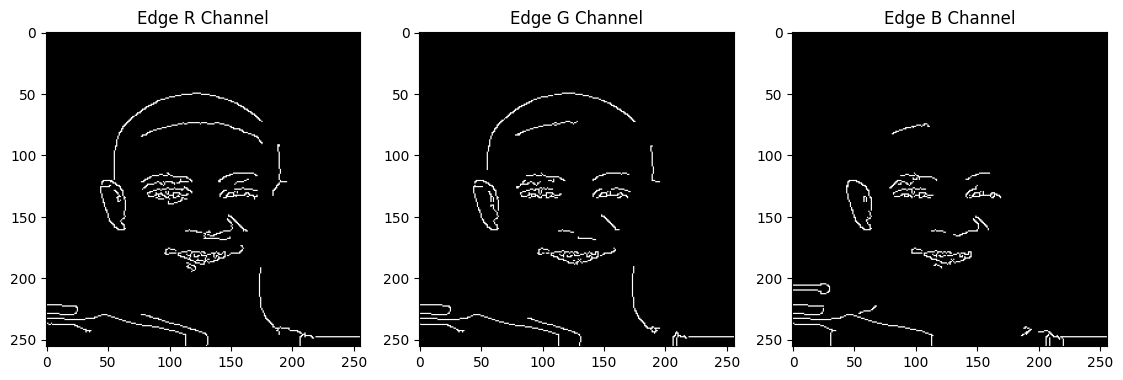

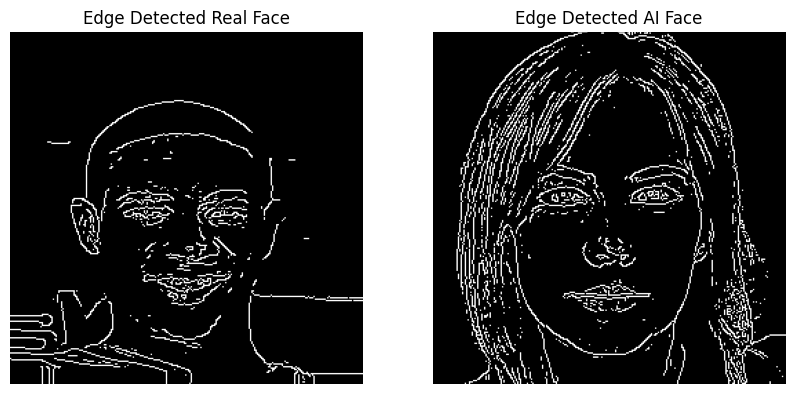

In [16]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to load random images from a folder
def load_random_images(folder, n_images, img_size):
    all_images = os.listdir(folder)
    random_images = random.sample(all_images, n_images)
    images = []
    for img_name in random_images:
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        images.append(img)
    return np.array(images)

# Parameters
img_size = (256, 256)
n_images_per_class = 1

# Load 1 random image from both folders
folder1 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\dataset\AI_faces'
folder2 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\dataset\real_faces'

ai = load_random_images(folder1, n_images_per_class, img_size)
real = load_random_images(folder2, n_images_per_class, img_size)


# Function to split an image into R, G, B channels and apply edge detection filter to each channel
def process_image(img):
    # Load the image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Split the image into R, G, B channels
    R, G, B = cv2.split(img_rgb)

    # Apply edge detection filter to each channel
    edge_R = cv2.Canny(R, 100, 200)
    edge_G = cv2.Canny(G, 100, 200)
    edge_B = cv2.Canny(B, 100, 200)

    return img_rgb, (R, G, B), (edge_R, edge_G, edge_B)

# Process the images
img_rgb_class1, channels_class1, edges_class1 = process_image(ai[0])
img_rgb_class2, channels_class2, edges_class2 = process_image(real[0])


# Function to display images
def display_images(original, channels, edges, title):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(original)
    plt.title(f'{title} - Original')

    plt.subplot(1, 4, 2)
    plt.imshow(channels[0], cmap='Reds')
    plt.title('R Channel')

    plt.subplot(1, 4, 3)
    plt.imshow(channels[1], cmap='Greens')
    plt.title('G Channel')

    plt.subplot(1, 4, 4)
    plt.imshow(channels[2], cmap='Blues')
    plt.title('B Channel')
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(edges[0], cmap='gray')
    plt.title('Edge R Channel')

    plt.subplot(1, 4, 2)
    plt.imshow(edges[1], cmap='gray')
    plt.title('Edge G Channel')

    plt.subplot(1, 4, 3)
    plt.imshow(edges[2], cmap='gray')
    plt.title('Edge B Channel')
    
    plt.tight_layout()
    plt.show()

# Display the images for class 1 (AI faces)
display_images(img_rgb_class1, channels_class1, edges_class1, 'Class 1 (AI)')

# Display the images for class 2 (Real faces)
display_images(img_rgb_class2, channels_class2, edges_class2, 'Class 2 (Real)')

simple_edge_ai=cv2.Canny(ai[0],100,100)
simple_edge_real=cv2.Canny(real[0],100,100)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot simple_edge_real on the first subplot
axs[0].imshow(simple_edge_real, cmap='gray')
axs[0].axis('off')  # Hide the axis
axs[0].set_title('Edge Detected Real Face')

# Plot simple_edge_ai on the second subplot
axs[1].imshow(simple_edge_ai, cmap='gray')
axs[1].axis('off')  # Hide the axis
axs[1].set_title('Edge Detected AI Face')
plt.show()

Now lets try and see if the model is doing any better if we give these images as the input into them 

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.5333 - loss: 0.7292 - val_accuracy: 0.7833 - val_loss: 0.5157
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 78s 842ms/step - accuracy: 0.7902 - loss: 0.4590 - val_accuracy: 0.8875 - val_loss: 0.2762
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 78s 841ms/step - accuracy: 0.8546 - loss: 0.3398 - val_accuracy: 0.8708 - val_loss: 0.3114
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 80s 861ms/step - accuracy: 0.8826 - loss: 0.2865 - val_accuracy: 0.8817 - val_loss: 0.2960
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 79s 851ms/step - accuracy: 0.9010 - loss: 0.2491 - val_accuracy: 0.8858 - val_loss: 0.2735
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 77s 837ms/step - accuracy: 0.9064 - loss: 0.2425 - val_accuracy: 0.9308 - val_loss: 0.1814
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 78s 835ms/step - accuracy: 0.9122 - loss: 0.2410 - val_accuracy: 0.9067 - val_loss: 0.2349
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 81s 868ms/step - accuracy: 0.9247 - loss: 0.1876 - val_accuracy: 0.9467 

38/38 - 16s - 428ms/step - accuracy: 0.9725 - loss: 0.0875
Test accuracy: 0.9725000262260437


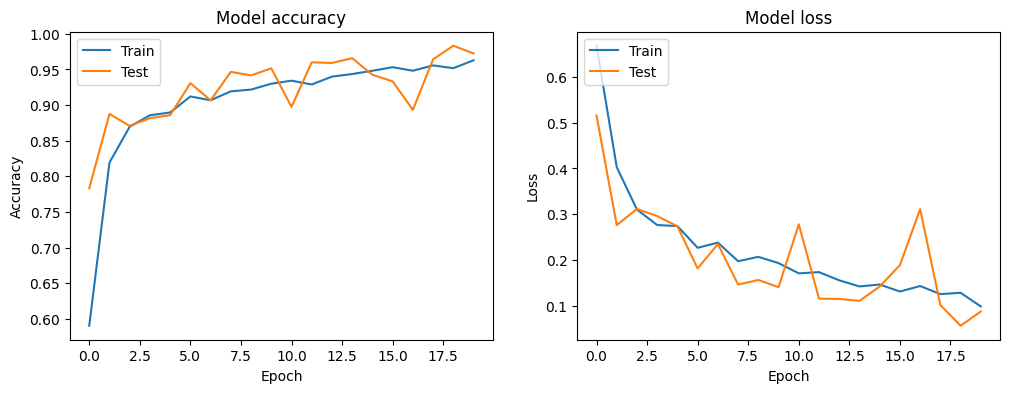

38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 428ms/step


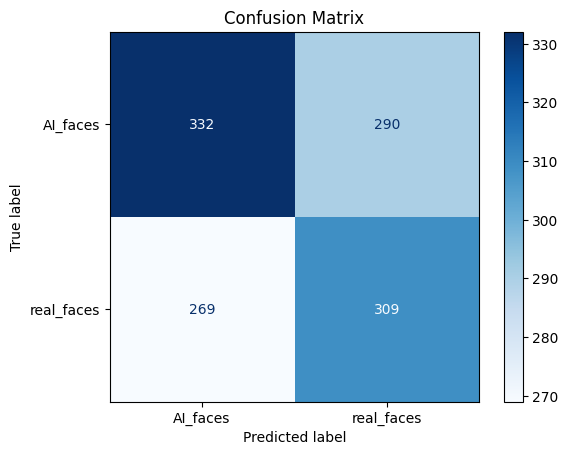

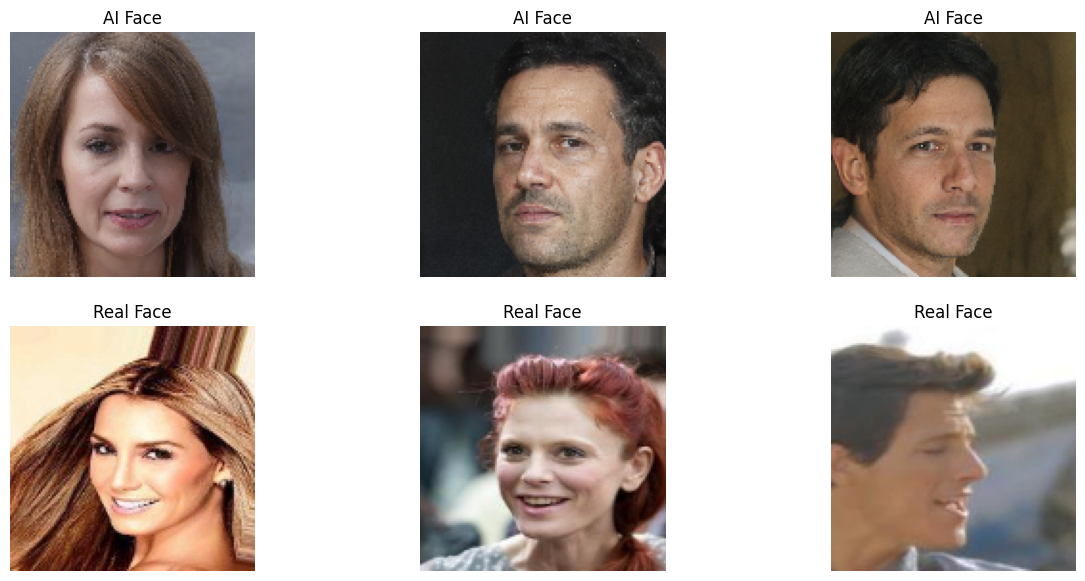

In [28]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Parameters
img_size = (128, 128)
batch_size = 32
epochs = 20
n_images_per_class = 2000  # Number of images to load from each folder

# Custom data generator
class CustomDataGenerator(Sequence):
    def __init__(self, image_paths, labels, batch_size, img_size, augmentations=None):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.augmentations = augmentations
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_image_paths = self.image_paths[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = [self.preprocess_image(cv2.imread(img_path)) for img_path in batch_image_paths]

        if self.augmentations:
            batch_images = [self.augmentations.random_transform(img) for img in batch_images]

        return np.array(batch_images), np.array(batch_labels)

    def preprocess_image(self, img):
        img = cv2.resize(img, self.img_size)
        R, G, B = cv2.split(img)
        edge_R = cv2.Canny(R, 100, 200)
        edge_G = cv2.Canny(G, 100, 200)
        edge_B = cv2.Canny(B, 100, 200)
        combined = np.stack([edge_R, edge_G, edge_B], axis=-1)
        combined = combined / 255.0
        return combined

    def on_epoch_end(self):
        self.epoch = getattr(self, 'epoch', -1) + 1
        c = list(zip(self.image_paths, self.labels))
        np.random.shuffle(c)
        self.image_paths, self.labels = zip(*c)

# Function to load image paths and labels from a folder
def load_image_paths_and_labels(folder, n_images):
    image_paths = []
    labels = []
    filenames = os.listdir(folder)[:n_images]  # Get the first n images
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            image_paths.append(img_path)
            labels.append(folder.split('\\')[-1])  # Use the folder name as the label
    return image_paths, labels

# Load image paths and labels from both folders
folder1 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\dataset\AI_faces'
folder2 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\dataset\real_faces'
image_paths1, labels1 = load_image_paths_and_labels(folder1, n_images_per_class)
image_paths2, labels2 = load_image_paths_and_labels(folder2, n_images_per_class)

# Combine image paths and labels
image_paths = image_paths1 + image_paths2
labels = labels1 + labels2

# Convert labels to binary
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Split data into training and testing sets
train_image_paths, test_image_paths, y_train, y_test = train_test_split(image_paths, labels, test_size=0.3, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Create custom data generators
train_generator = CustomDataGenerator(train_image_paths, y_train, batch_size, img_size, augmentations=datagen)
test_generator = CustomDataGenerator(test_image_paths, y_test, batch_size, img_size)

# Build the CNN model
input_shape = (img_size[0], img_size[1], 3)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

model.save('ai_vs_real_face_classifier_edges.h5')

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Confusion matrix
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Display the first 3 images from both classes
def display_first_3_images(image_paths, title, ax):
    for i in range(3):
        img = cv2.imread(image_paths[i])
        img = cv2.resize(img, img_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(title)

fig, axs = plt.subplots(2, 3, figsize=(15, 7))

display_first_3_images(image_paths1, 'AI Face', axs[0])
display_first_3_images(image_paths2, 'Real Face', axs[1])

plt.show()



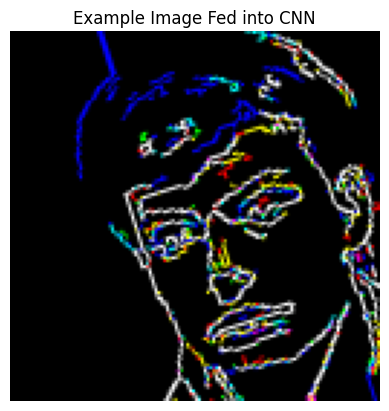

As we saw the output of the confusion matrix is showing that the method was not able to distinguish the  images based on the edge extraction method .

As a result of this we had to find some other method of doing the same , and now we turn to the frequency domain representaion of the images 

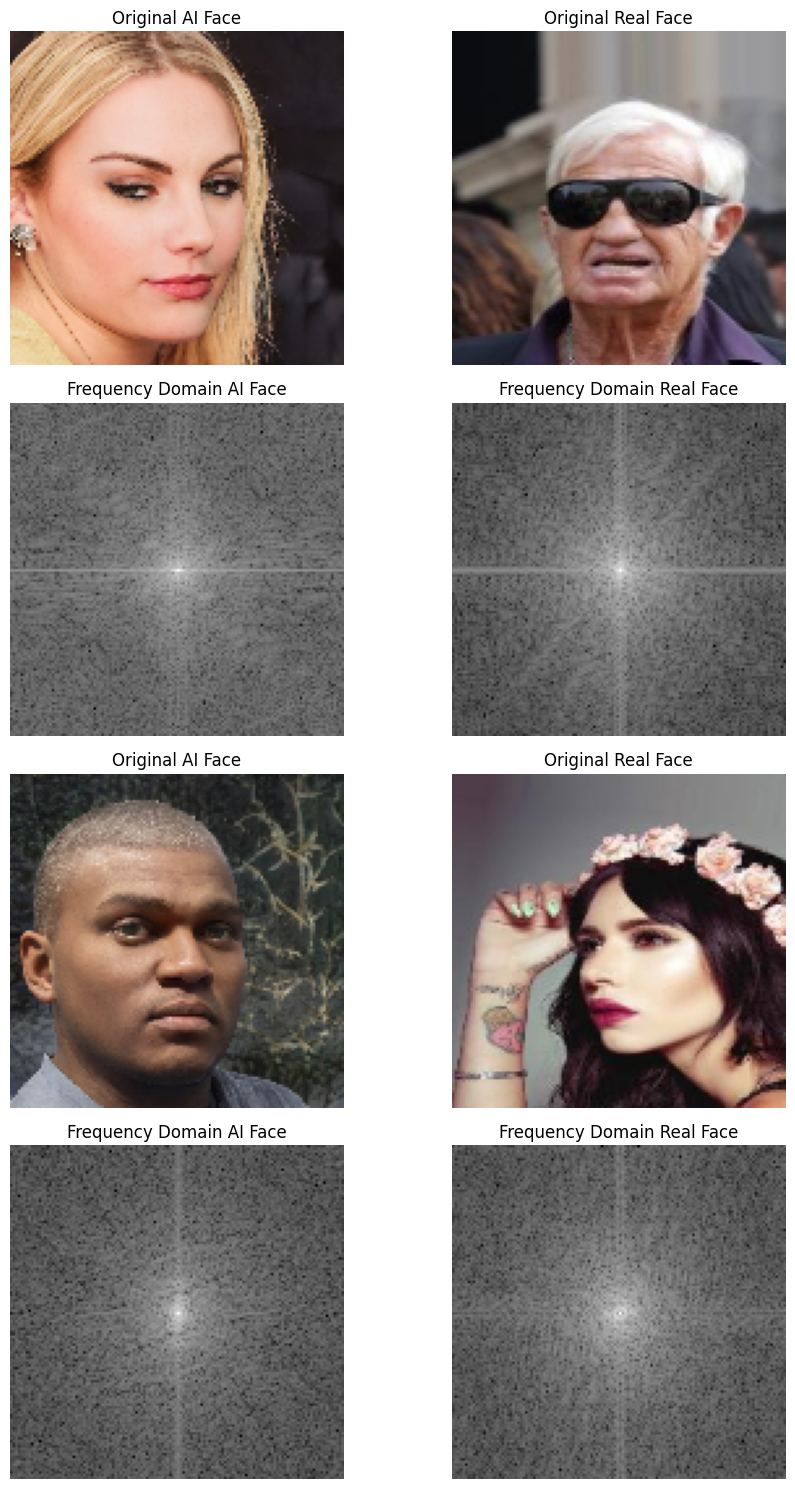

In [34]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

# Function to perform frequency domain analysis
def frequency_domain_analysis(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply DFT
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Add 1 to avoid log(0)
    return magnitude_spectrum

# Function to load n random images from a folder
def load_random_images(folder, n_images, img_size):
    all_images = os.listdir(folder)
    random_images = random.sample(all_images, n_images)
    images = []
    for img_name in random_images:
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        images.append(img)
    return np.array(images)

# Parameters
img_size = (128, 128)
n_images = 2

# Load 2 random images from both folders
folder1 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\dataset\AI_faces'
folder2 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\dataset\real_faces'
ai_images = load_random_images(folder1, n_images, img_size)
real_images = load_random_images(folder2, n_images, img_size)

# Perform frequency domain analysis on the images
ai_freq_images = [frequency_domain_analysis(img) for img in ai_images]
real_freq_images = [frequency_domain_analysis(img) for img in real_images]

# Plot the original and frequency domain images
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

for i in range(n_images):
    # Plot original AI-generated face
    axs[i*2, 0].imshow(cv2.cvtColor(ai_images[i], cv2.COLOR_BGR2RGB))
    axs[i*2, 0].axis('off')
    axs[i*2, 0].set_title('Original AI Face')
    
    # Plot frequency domain of AI-generated face
    axs[i*2+1, 0].imshow(ai_freq_images[i], cmap='gray')
    axs[i*2+1, 0].axis('off')
    axs[i*2+1, 0].set_title('Frequency Domain AI Face')
    
    # Plot original real face
    axs[i*2, 1].imshow(cv2.cvtColor(real_images[i], cv2.COLOR_BGR2RGB))
    axs[i*2, 1].axis('off')
    axs[i*2, 1].set_title('Original Real Face')
    
    # Plot frequency domain of real face
    axs[i*2+1, 1].imshow(real_freq_images[i], cmap='gray')
    axs[i*2+1, 1].axis('off')
    axs[i*2+1, 1].set_title('Frequency Domain Real Face')

plt.tight_layout()
plt.show()


Now lets try and make the cnn understand the difference between the two

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 43s 184ms/step - accuracy: 0.4961 - loss: 0.6974 - val_accuracy: 0.4877 - val_loss: 0.6937
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 39s 177ms/step - accuracy: 0.6159 - loss: 0.6198 - val_accuracy: 0.9343 - val_loss: 0.1972
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 39s 177ms/step - accuracy: 0.8602 - loss: 0.2969 - val_accuracy: 0.9413 - val_loss: 0.1697
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 40s 181ms/step - accuracy: 0.9042 - loss: 0.2505 - val_accuracy: 0.9357 - val_loss: 0.1921
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 39s 179ms/step - accuracy: 0.8843 - loss: 0.2525 - val_accuracy: 0.9440 - val_loss: 0.1590
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 40s 180ms/step - accuracy: 0.9084 - loss: 0.2377 - val_accuracy: 0.9563 - val_loss: 0.1233
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 39s 178ms/step - accuracy: 0.9331 - loss: 0.1956 - val_accuracy: 0.9600 - val_loss: 0.1127
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 40s 182ms/step - accuracy: 0.9298 - loss: 0

94/94 - 3s - 34ms/step - accuracy: 0.9647 - loss: 0.0984
Test accuracy: 0.9646666646003723


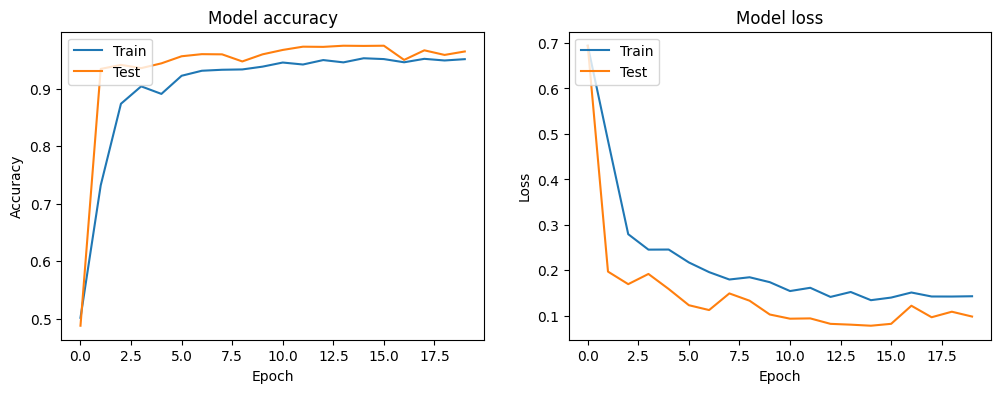

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


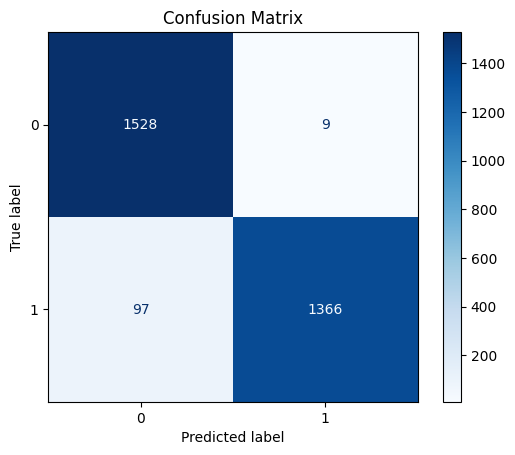

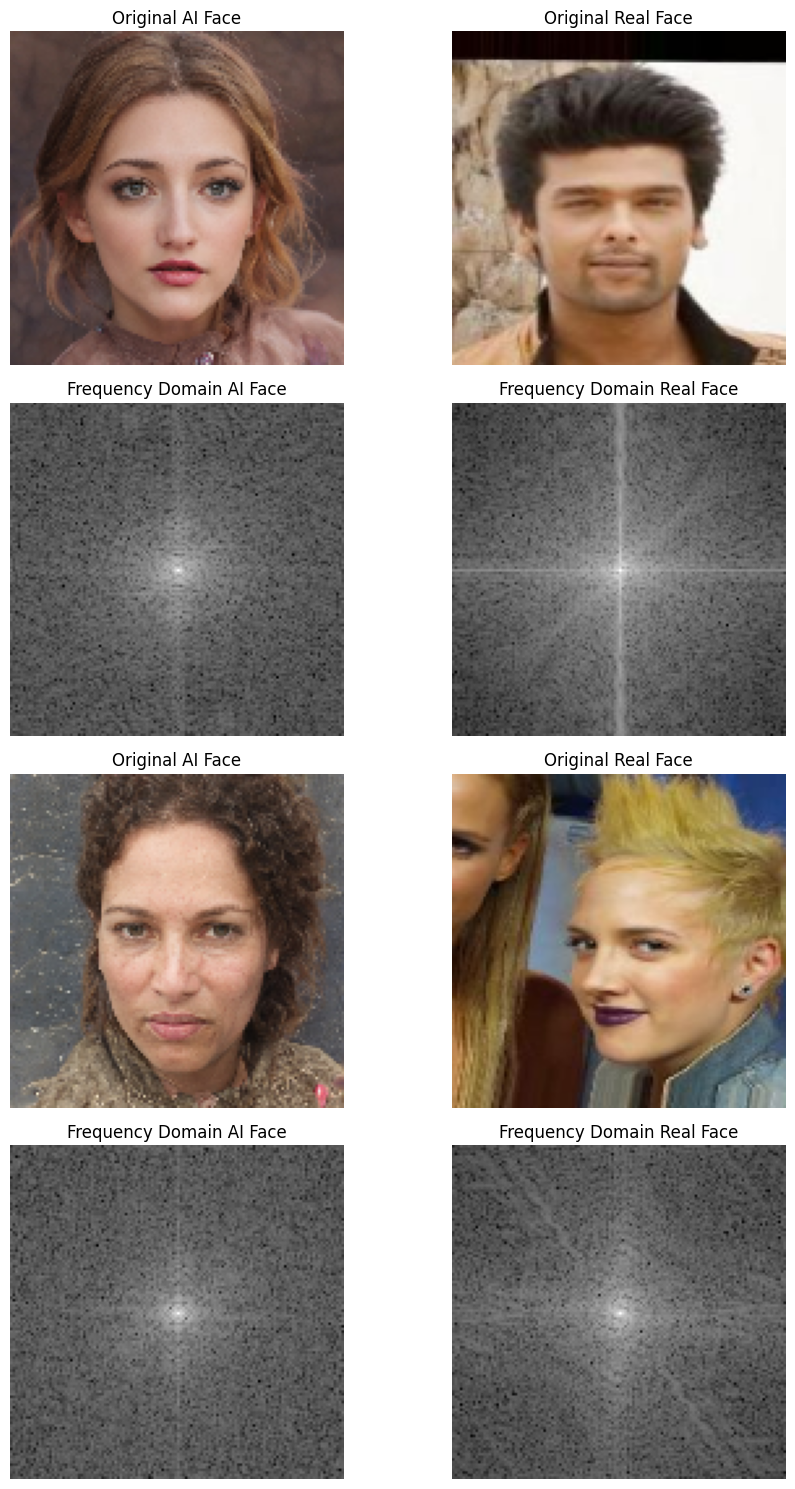

In [31]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Function to perform frequency domain analysis
def frequency_domain_analysis(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply DFT
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Add 1 to avoid log(0)
    return magnitude_spectrum

# Function to load n random images from a folder
def load_random_images(folder, n_images, img_size):
    all_images = os.listdir(folder)
    random_images = random.sample(all_images, n_images)
    images = []
    for img_name in random_images:
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        images.append(img)
    return np.array(images)

# Parameters
img_size = (128, 128)
n_images_per_class = 5000

# Load images from both folders
folder1 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\dataset\AI_faces'
folder2 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\dataset\real_faces'
ai_images = load_random_images(folder1, n_images_per_class, img_size)
real_images = load_random_images(folder2, n_images_per_class, img_size)

# Perform frequency domain analysis on the images
ai_freq_images = np.array([frequency_domain_analysis(img) for img in ai_images])
real_freq_images = np.array([frequency_domain_analysis(img) for img in real_images])

# Combine and label the dataset
images = np.concatenate((ai_freq_images, real_freq_images), axis=0)
labels = np.array([0] * n_images_per_class + [1] * n_images_per_class)  # 0 for AI, 1 for Real

# Normalize the images
images = images[..., np.newaxis] / 255.0  # Add channel dimension and normalize

# Convert labels to binary
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Build the CNN model
input_shape = (img_size[0], img_size[1], 1)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save('ai_vs_real_face_classifier_freq.h5')

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot the original and frequency domain images for visualization
n_images = 2
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

for i in range(n_images):
    # Plot original AI-generated face
    axs[i*2, 0].imshow(cv2.cvtColor(ai_images[i], cv2.COLOR_BGR2RGB))
    axs[i*2, 0].axis('off')
    axs[i*2, 0].set_title('Original AI Face')
    
    # Plot frequency domain of AI-generated face
    axs[i*2+1, 0].imshow(ai_freq_images[i], cmap='gray')
    axs[i*2+1, 0].axis('off')
    axs[i*2+1, 0].set_title('Frequency Domain AI Face')
    
    # Plot original real face
    axs[i*2, 1].imshow(cv2.cvtColor(real_images[i], cv2.COLOR_BGR2RGB))
    axs[i*2, 1].axis('off')
    axs[i*2, 1].set_title('Original Real Face')
    
    # Plot frequency domain of real face
    axs[i*2+1, 1].imshow(real_freq_images[i], cmap='gray')
    axs[i*2+1, 1].axis('off')
    axs[i*2+1, 1].set_title('Frequency Domain Real Face')

plt.tight_layout()
plt.show()


lets try giving some random input to the model and see if it classifies it correctly

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


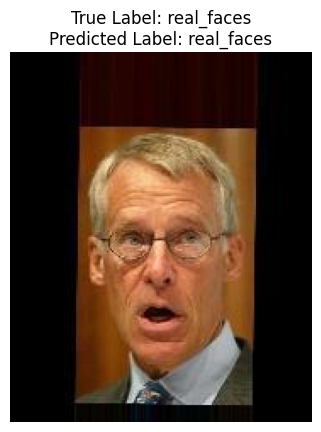

True Label: real_faces
Predicted Label: real_faces


In [42]:
import random
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
img_size = (128, 128)

# Load the saved model
model = tf.keras.models.load_model('ai_vs_real_face_classifier_freq.h5')

# Function to perform frequency domain analysis
def frequency_domain_analysis(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply DFT
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Add 1 to avoid log(0)
    return magnitude_spectrum

# Function to load and preprocess a random image
def load_and_preprocess_random_image(folder1, folder2, img_size):
    # Choose a random folder
    folder = random.choice([folder1, folder2])
    # Choose a random image from the chosen folder
    img_name = random.choice(os.listdir(folder))
    img_path = os.path.join(folder, img_name)
    # Load the image
    img = cv2.imread(img_path)
    # Resize the image
    img = cv2.resize(img, img_size)
    # Perform frequency domain analysis
    img_freq = frequency_domain_analysis(img)
    # Normalize the image
    img_freq = img_freq[..., np.newaxis] / 255.0  # Add channel dimension and normalize
    return img_freq, folder.split('\\')[-1], img_path  # Return image, label (folder name), and path

# Define the folders
folder1 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\small dataset\AI_faces'
folder2 = r'C:\Users\ASUS\Desktop\AMRITA BTECH ALL SEM FILES\6th sem\MIS6\end sem\small dataset\real_faces'

# Load and preprocess a random image
img, true_label, img_path = load_and_preprocess_random_image(folder1, folder2, img_size)

# Predict the class of the image
img_reshaped = np.expand_dims(img, axis=0)  # Add batch dimension
prediction = model.predict(img_reshaped)
predicted_label = 'AI_faces' if prediction[0] < 0.5 else 'real_faces'

# Display the image and prediction
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title(f'True Label: {true_label}\nPredicted Label: {predicted_label}')
plt.axis('off')
plt.show()

print(f'True Label: {true_label}')
print(f'Predicted Label: {predicted_label}')


# The model is able to better predict the AI and Real images with respect to the other two models we have mentioned here .

# This is the flow chart of what the process of our method looks like 

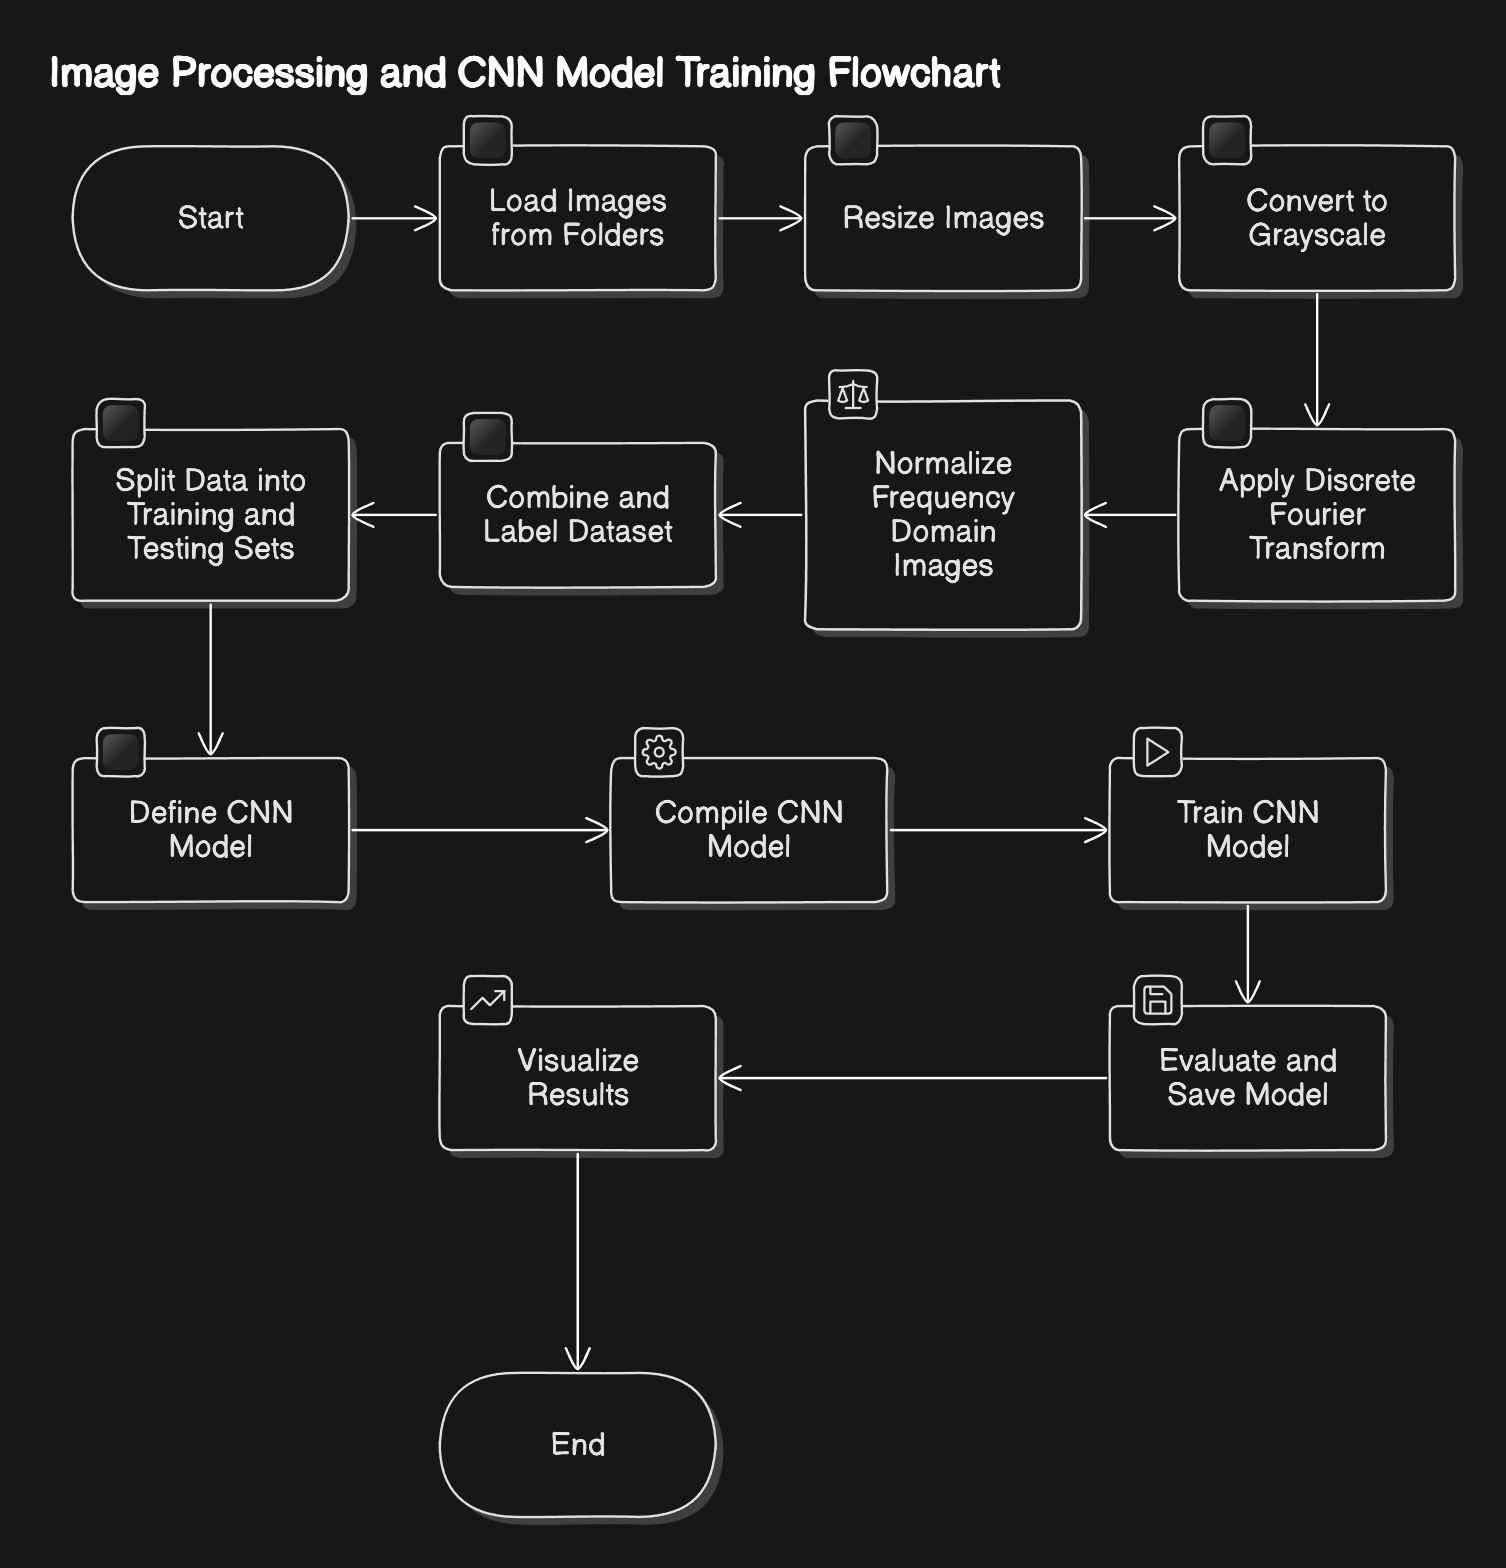